In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
def Q_factor_to_dataframe(dfin, tan_ma, tan_ms, tan_sa, tan_substrate):
    df = dfin.copy()
    df['1/Q_MA_fixed'] = df['p_MA_fixed']*tan_ma
    df['1/Q_MS_fixed'] = df['p_MS_fixed']*tan_ms
    df['1/Q_SA_fixed'] = df['p_SA_fixed']*tan_sa
    df['1/Q_substrate_fixed'] = df['p_substrate_fixed']*tan_substrate
    df['1/Q'] = df['1/Q_MA_fixed'] + df['1/Q_MS_fixed'] + df['1/Q_SA_fixed'] + df['1/Q_substrate_fixed']
    df['Q_MA_fixed'] = 1./df['1/Q_MA_fixed']
    df['Q_MS_fixed'] = 1./df['1/Q_MS_fixed']
    df['Q_SA_fixed'] = 1./df['1/Q_SA_fixed']
    df['Q_substrate_fixed'] = 1./df['1/Q_substrate_fixed']
    df['Q'] = 1./df['1/Q']
    df['tan_ma']=tan_ma
    df['tan_ms']=tan_ms
    df['tan_sa']=tan_sa
    df['tan_substrate']=tan_substrate
    return df

In [16]:
eigenmode_paths=[
    'libraries/clockmon_eigenmode_epr.csv',
]
names = [
    'Clockmon',
]


In [17]:
# case 0: Niko's Thesis
# case 1: Nb-Si copy of https://arxiv.org/abs/2012.10761
# case 2: same as previous, but pessimistic substrate from https://arxiv.org/abs/2211.16437
# case 3: TiN-SI copy of https://arxiv.org/abs/2211.16437
# case 4: TiN-SI with better substrate as 1st
# case 5: "best hypothesis: MA and MS dominate": [6000e-6, 5500e-6, 0, 0.30e-6]
# case 6: "best hypothesis: MA and SA dominate": [6000e-6, 0, 1500e-6, 0.30e-6]


case_strs = [
    "case 0: Niko's Thesis",
    'case 1: Nb-Si https://arxiv.org/abs/2012.10761',
    'case 2: Pessimistic substrate https://arxiv.org/abs/2211.16437',
    'case 3: TiN-SI https://arxiv.org/abs/2211.16437',
    'case 4: TiN-SI with better substrate',
    'case 5: Best hypothesis QFA, QFB: MA and MS dominate',
    'case 6: Best hypothesis QFA, QFB: MA and SA dominate',
]
   


In [18]:
# ma_vals = [9.9e-3, 9.9e-3, 9.9e-3, 3.5e-3, 3.5e-3, 6e-3, 6e-3]
# ms_vals = [2.6e-3, 3.5e-4, 3.5e-4, 2.7e-4, 2.7e-4, 5.5e-3, 0]
# sa_vals = [2.1e-3, 1.7e-3, 1.7e-3, 1.0e-3, 1.0e-3, 0, 1.5e-3]
# substrate_vals = [5e-7, 1.3e-7, 2.8e-7, 2.8e-7, 1.3e-7, 3e-7, 3e-7]

# Let's have a naive approach for now
ma_vals = [9.9e-3]
ms_vals = [3.5e-4]
sa_vals = [1.7e-3]

substrate_vals = [1.3e-7]
case_names = [f"ms:{ms}, ma:{ma}, sa:{sa}, substrate:{substrate}"
              for ms, ma, sa, substrate in zip(ms_vals, ma_vals, sa_vals, substrate_vals)]


dfs = []
for i_tan in range(len(ma_vals)):
    for epath in eigenmode_paths:
        df = pd.read_csv(epath)
        df['case']=df.index*0+i_tan
        dfs.append(Q_factor_to_dataframe(df, ma_vals[i_tan], ms_vals[i_tan], sa_vals[i_tan], substrate_vals[i_tan]))

df = pd.concat(dfs)

In [19]:
f = 5.7e9
omega = 2.*np.pi*f
df['T1']=df['Q']/omega*1e6
df['T1']

0    61.018257
Name: T1, dtype: float64

In [20]:
df['Q']

0    2.185317e+06
Name: Q, dtype: float64

In [21]:
clockmon_ma_mer = df.iloc[0]["p_MA_fixed"]
clockmon_sa_mer = df.iloc[0]["p_SA_fixed"]
clockmon_ms_mer = df.iloc[0]["p_MS_fixed"]
clockmon_substrate_mer = df.iloc[0]["p_substrate_fixed"]
clockmon_air_mer = df.iloc[0]["p_vacuum_fixed"]

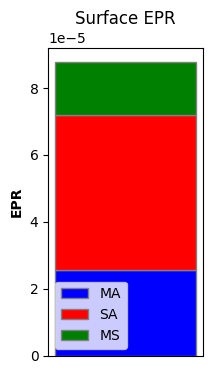

In [22]:
mer = [clockmon_ma_mer, clockmon_sa_mer, clockmon_ms_mer]

# Data for plotting
categories = ['mer']
MA = [mer[0]]
SA = [mer[1]]
MS = [mer[2]]

# Create the plot
fig, ax = plt.subplots()
fig.set_size_inches(2, 4)  
bar_width = 0.3
r1 = range(len(categories))

ax.bar(r1, MA, color='b', edgecolor='grey', width=bar_width, label='MA')
ax.bar(r1, SA, bottom=MA, color='r', edgecolor='grey', width=bar_width, label='SA')
ax.bar(r1, MS, bottom=[i+j for i,j in zip(MA, SA)], color='g', edgecolor='grey', width=bar_width, label='MS')

# ax.set_xlabel('Categories', fontweight='bold')
ax.set_ylabel('EPR', fontweight='bold')
ax.set_title('Surface EPR')
ax.set_xticks([])
# ax.set_xticklabels(categories)
ax.legend()
plt.savefig("surface_loss.svg", bbox_inches = "tight")
plt.show()

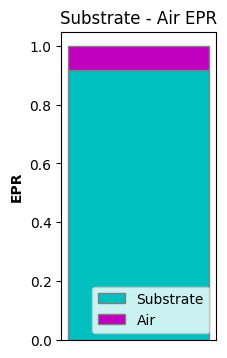

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(2, 4)  # Adjust the width and height as needed

categories = ['mer']
substrate = [clockmon_substrate_mer, ]
air = [clockmon_air_mer]

bar_width = 0.5
r1 = range(len(categories))

ax.bar(r1, substrate, color='c', edgecolor='grey', width=bar_width, label='Substrate')
ax.bar(r1, air, bottom=substrate, color='m', edgecolor='grey', width=bar_width, label='Air')

# ax.set_xlabel('Categories', fontweight='bold')
ax.set_ylabel('EPR', fontweight='bold')
ax.set_title('Substrate - Air EPR')
ax.set_xticks([])
# ax.set_xticklabels(categories)
ax.legend(loc='lower right') 
plt.savefig("bulk_loss.svg", bbox_inches = "tight")

plt.show()